In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_24_WEEK_PROGRAM/master/M05-Supervised_Machine_Learning/D04-Random_Forest/01-Exercises/src/Admission_Predict_Ver1.1.csv?token=AGKBMYIYNNMOM5BGGXRGPJK7Q33AE')

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
dataset = dataset.drop("Serial No.",axis=1)

In [12]:
#Notre variable est une probabilité on va la transformé en classe

dataset.iloc[:,-1] = dataset.iloc[:,-1].apply(lambda x: 1 if x>=0.75 else 0)

In [13]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


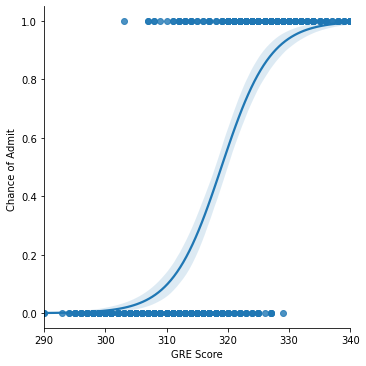

In [14]:
#On va observer les relation entre les variables GRE Score, TOEFL Score et CGPA et notre variable cible Chance of Admit

sns.lmplot(x=dataset.columns[0],
           y=dataset.columns[-1],
           data=dataset,
           logistic=True)

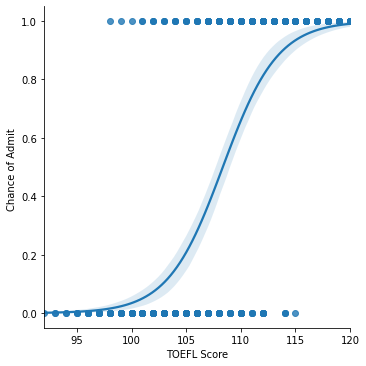

In [15]:
sns.lmplot(x=dataset.columns[1],
           y=dataset.columns[-1],
           data=dataset,
           logistic=True)

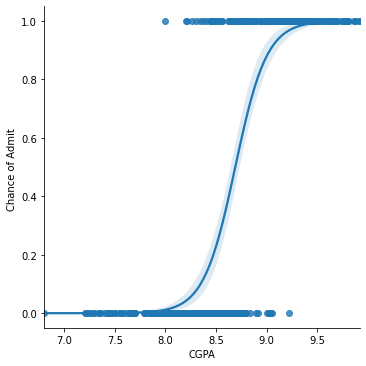

In [16]:
sns.lmplot(x=dataset.columns[5],
           y=dataset.columns[-1],
           data=dataset,
           logistic=True)

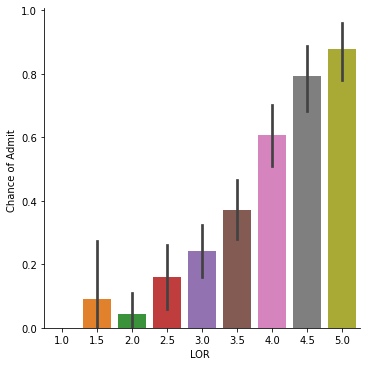

In [19]:
sns.catplot(x=dataset.columns[4],
           y=dataset.columns[-1],
           data=dataset,
           kind="bar")

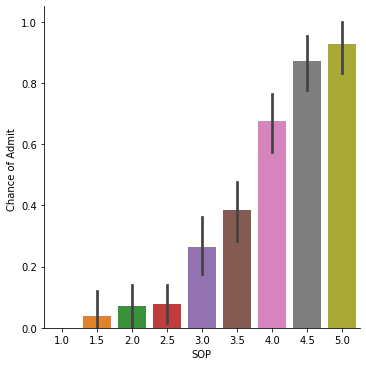

In [20]:
sns.catplot(x=dataset.columns[3],
            y=dataset.columns[-1],
            data=dataset,
            kind="bar")

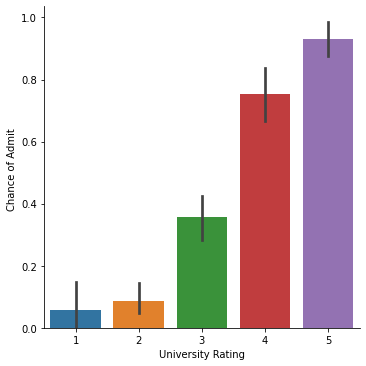

In [21]:
sns.catplot(
    x=dataset.columns[2],
    y=dataset.columns[-1],
    data=dataset,
    kind="bar"
)

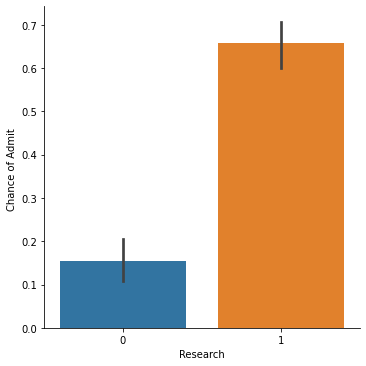

In [22]:
sns.catplot(
    x=dataset.columns[-2],
    y=dataset.columns[-1],
    data=dataset,
    kind="bar"
)

In [27]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [29]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
classifier_tree.score(X_test,y_test)

0.8066666666666666

In [31]:
classifier_tree.score(X_train,y_train)

1.0

In [32]:
y_pred = classifier_tree.predict(X_test)

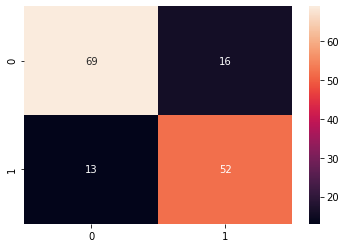

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [35]:
y_test.mean() #la classe la plus représentée est donc de 57% => element de comparaison !! Nbre de gens classés en O ou en 1 / Nbre total de gens à classer => ici 86% très bon versus 57%

0.43333333333333335

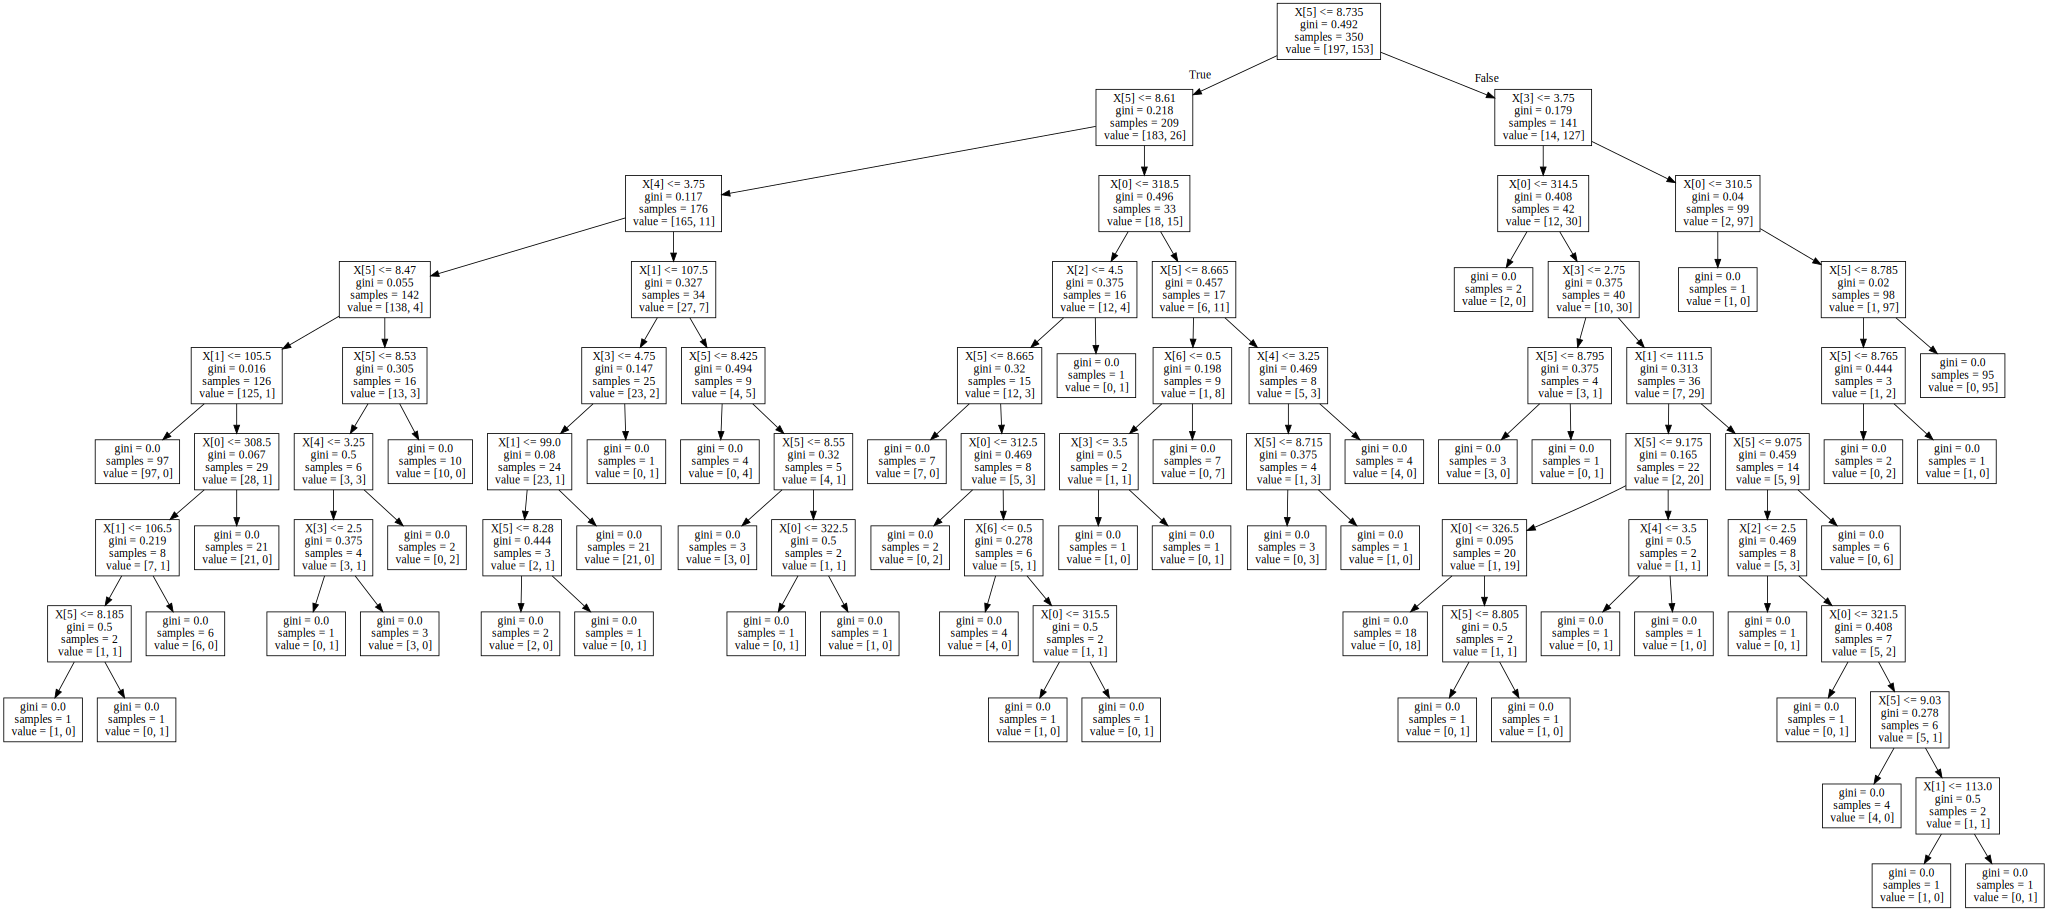

In [36]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(classifier_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [38]:
#Classement des features les plus importantes 

feature_imp = pd.DataFrame({"features":dataset.columns[:-1], "score": classifier_tree.feature_importances_}).sort_values(by="score",ascending=True)
feature_imp

,features,score
6,Research,0.008387
2,University Rating,0.012151
4,LOR,0.037639
1,TOEFL Score,0.038276
3,SOP,0.061796
0,GRE Score,0.075689
5,CGPA,0.766062


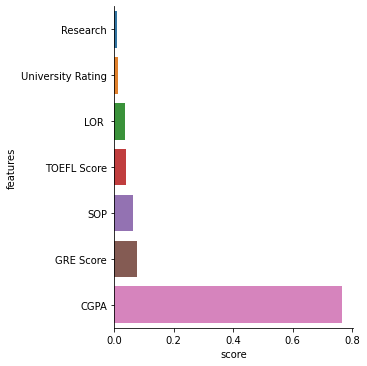

In [41]:
sns.catplot(x=feature_imp.score,
           y=feature_imp.features,
           data=feature_imp,
           kind="bar")

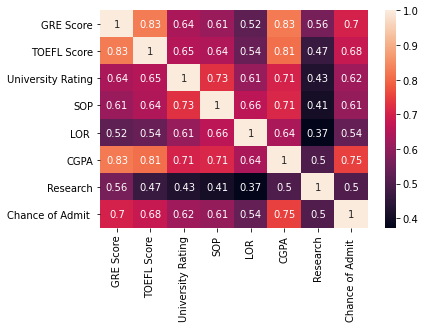

In [44]:
sns.heatmap(dataset.corr(), annot=True)

In [46]:
# Afin d'améliorer notre score on va tester un modèle de random forest avec 50 arbres 


from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_train,y_train)

1.0

In [47]:
rf_classifier.score(X_test,y_test)

0.8733333333333333

In [48]:
# Test avec 20 arbres

rf_classifier_20 = RandomForestClassifier(n_estimators=20)
rf_classifier_20.fit(X_train, y_train)
rf_classifier_20.score(X_train, y_train)

rf_classifier.score(X_test, y_test)

0.8733333333333333

In [53]:
# Il semble avoir un nombre optimum d'arbres nous allons l'évaluer grâce à une Grid Search

from sklearn.model_selection import GridSearchCV

rf_classifier_grid = RandomForestClassifier()

params = {"n_estimators": range(20,70)}

classifier = GridSearchCV(cv=10,estimator = rf_classifier_grid, param_grid = params).fit(X_train, y_train)


In [54]:
classifier.best_params_

{'n_estimators': 62}

In [58]:
classifier.best_estimator_.score(X_test, y_test)

0.8533333333333334

In [59]:
RandomForestClassifier.feature_importances_?

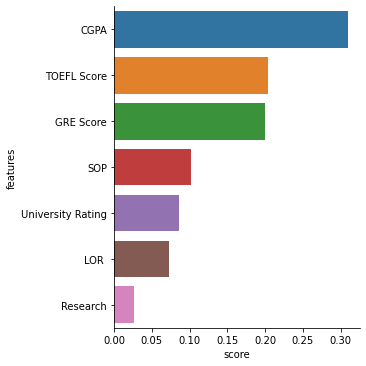

In [60]:
feature_importance = pd.DataFrame({"features": dataset.columns[:-1], "score": classifier.best_estimator_.feature_importances_}).sort_values(by="score", ascending=False)
sns.catplot(x="score",y="features", data=feature_importance, kind="bar" )